In [79]:
%reload_ext autoreload
%autoreload 2
import sys

sys.path.append("../..")
from clonk.backend_utils import FakeHatlab

backend_hatlab = FakeHatlab(dimension=1, router_as_qubits=False)

from clonk.utils.transpiler_passes import level_0_pass_manager

pm_hypercube = level_0_pass_manager(
    backend_hatlab,
    basis_gate="riswap",
    routing="basic",
    decompose_swaps=False,
    decompose_1q=False,
)

from qiskit import QuantumCircuit

circuit = QuantumCircuit(20)
circuit.cx(1, 4)
circuit.cx(3, 2)
circuit.cx(6, 8)
# circuit.draw()

This backend's operations: rz,x,y,sx,sxdg,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output
/home/evm9/transpilation_EM/venv/lib/python3.8/site-packages/qiskit/transpiler/passes/optimization/consolidate_blocks.py:55: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(kak_basis_gate)
This backend's operations: rz,x,y,sx,sxdg,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output


In [80]:
transp = pm_hypercube.run(circuit)
transp.draw(output="mpl")

/home/evm9/transpilation_EM/utils/transpiler_passes/../../utils/transpiler_passes/weyl_decompose.py:196: UserWarning: Only know how to decompose properly for supercontrolled basis gate. This gate is ~Ud(0.3926990816987239, 0.3926990816987239, 0.0)
  self.decomposer = TwoQubitBasisDecomposer(self.basis_gate)
This backend's operations: rz,x,y,sx,sxdg,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output
This backend's operations: rz,x,y,sx,sxdg,measure only apply to a subset of qubits. Using this property to get 'basis_gates' for the transpiler may potentially create invalid output


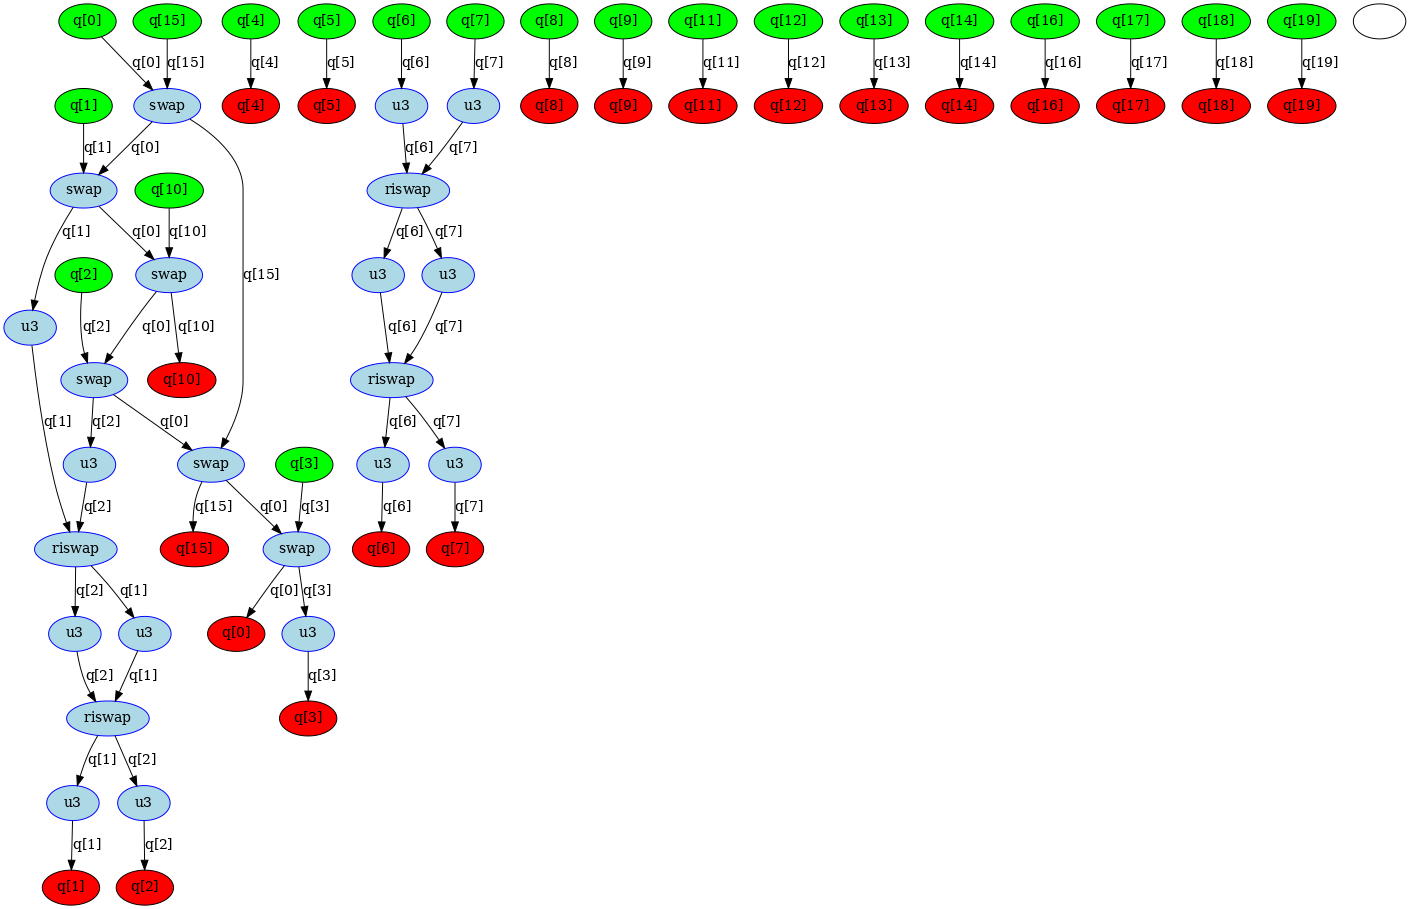

In [58]:
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer

dag = circuit_to_dag(transp)
dag_drawer(dag)